DSSC part 1 project.

In [2]:
import numpy as np
import random as rand
import math
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import scipy.optimize as sciopt

In [2]:
#Question 1: Using PCA to extract features from the Ruderman dataset.

#First loading 'image_i.txt' files to numpy array.
#This dict will contain each filename, e.g. 'image_38.txt':
ImageNames={} 
for i in range(45): 
    ImageNames[i] = "image_" + str(i+1) + ".txt"
#This ndarray will contain all the image luminance data:
Images = np.empty((45,256,256))
#Now loading:
for i in range(45):
    Images[i] = pd.read_fwf(ImageNames[i],header=None).to_numpy()

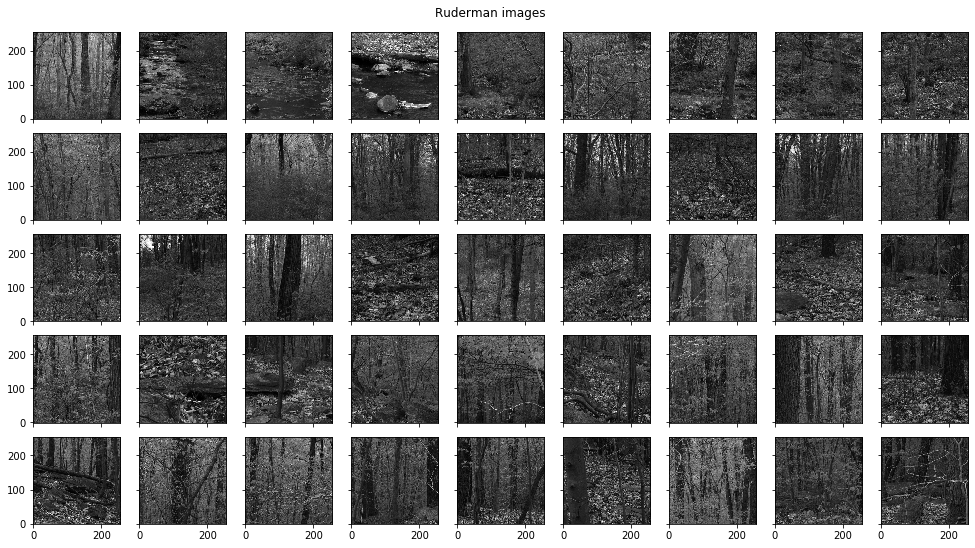

In [3]:
#Plotting all images:
fig, ax = plt.subplots(5,9,sharex=True,sharey=True,figsize=[13.5,7.5],constrained_layout=True)
ax = ax.flatten()

for i in range(45):
    ax[i].imshow(Images[i],cmap='gray',origin='lower')

fig.suptitle("Ruderman images")
fig.savefig("rudermanDataset.jpg")

In [4]:
#Now plotting the mean-subtracted log-luminance for each image. First, log transform:
ImagesLog = np.log(Images)

#Now mean subtraction for each image:
for i in range(45):
    ImagesLog[i] = ImagesLog[i] - np.mean(ImagesLog[i])

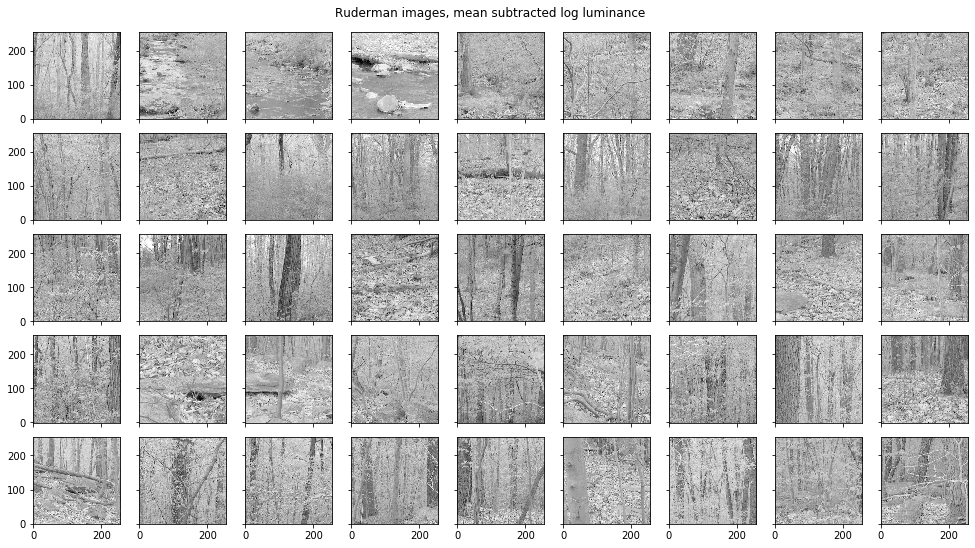

In [5]:
#Plotting all images:
fig, ax = plt.subplots(5,9,sharex=True,sharey=True,figsize=[13.5,7.5],constrained_layout=True)
ax = ax.flatten()

for i in range(45):
    ax[i].imshow(ImagesLog[i],cmap='gray',origin='lower')

fig.suptitle("Ruderman images, mean subtracted log luminance")
fig.savefig("rudermanDatasetMSLL.jpg")

In [6]:
#extracting the 7*7 patches
import scipy.stats
import seaborn as sns
images=np.array(ImagesLog)
patches= [[0 for x in range(49)] for y in range(36*36*45)]
for x in np.arange(0,45):
    for t in np.arange(0,36):
        for i in np.arange(0,36):
            patches[i+36*t+x*1296]=images[x,0+i*7:7+i*7,0+t*7:7+t*7].flatten()  

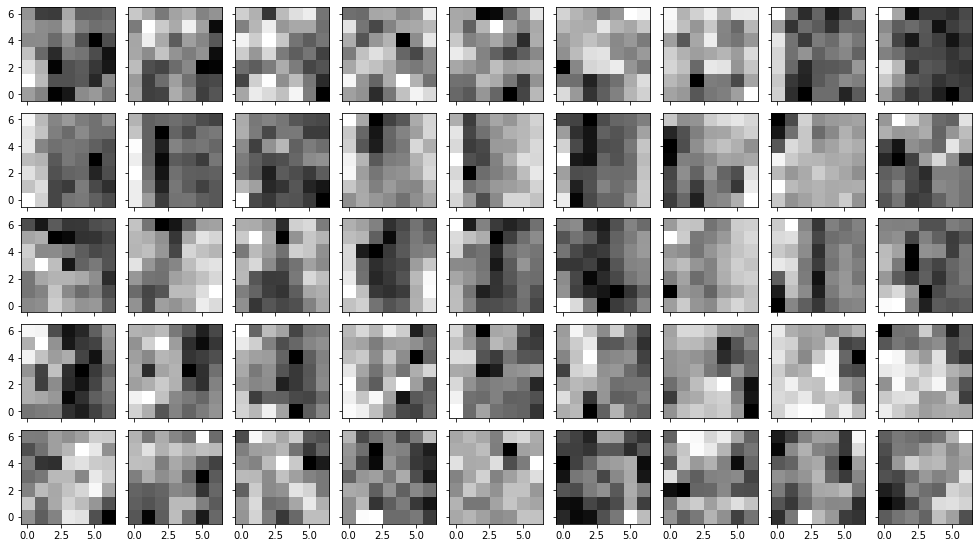

In [7]:
#the first 45 patches
fig, ax = plt.subplots(5,9,sharex=True,sharey=True,figsize=[13.5,7.5],constrained_layout=True)
ax = ax.flatten()
patches_tmp= [[0 for x in range(7)] for y in range(7)]
patches_subset = np.empty((45,7,7))
for m in range(45):
    for i in np.arange(0,7):
        patches_tmp[i]=patches[m][i*7:7*i+7]
    patches_subset[m]=patches_tmp
    patches_tmp= [[0 for x in range(7)] for y in range(7)]
for i in range(45):
    ax[i].imshow(patches_subset[i],cmap='gray',origin='lower')

Text(0, 0.5, 'Second Principal Component')

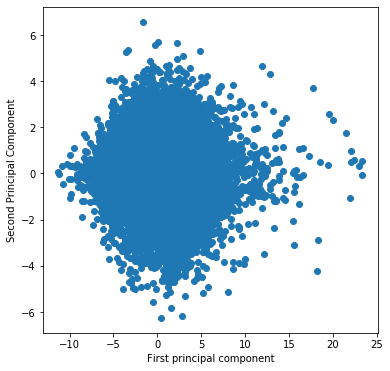

In [8]:
#Now we do PCA on these patches:
from sklearn.decomposition import PCA
pca = PCA(n_components=49,copy=True,random_state=0)
x_pca = pca.fit_transform(patches)
plt.figure(figsize=(6,6))
plt.scatter(x_pca[:,0],x_pca[:,1])
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

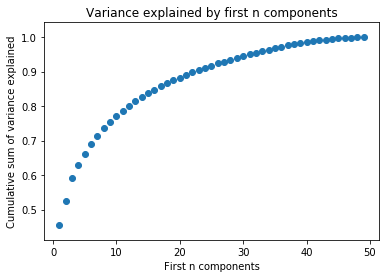

In [9]:
#Visualizing the relative size of the eigenvalues:
plt.scatter(range(1,50),np.cumsum(pca.explained_variance_ratio_[0:49]))
plt.xlabel("First n components")
plt.ylabel("Cumulative sum of variance explained")
plt.title("Variance explained by first n components")
plt.savefig("cumSumVsCompRank.jpg")

In [10]:
#Now storing the 49-D components as 7*7 arrays which will be displayed as images:
CompImages = np.zeros((49,7,7))
for i in range(49):
    l=0
    for j in range(7):
        for k in range(7):
            CompImages[i][j][k] = pca.components_[i][l]
            l+=1

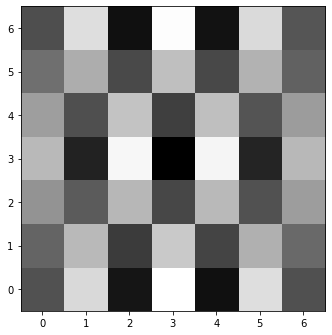

In [11]:
plt.figure(figsize=(5.6,5.6))
plt.imshow(CompImages[44],cmap='gray',origin='lower')

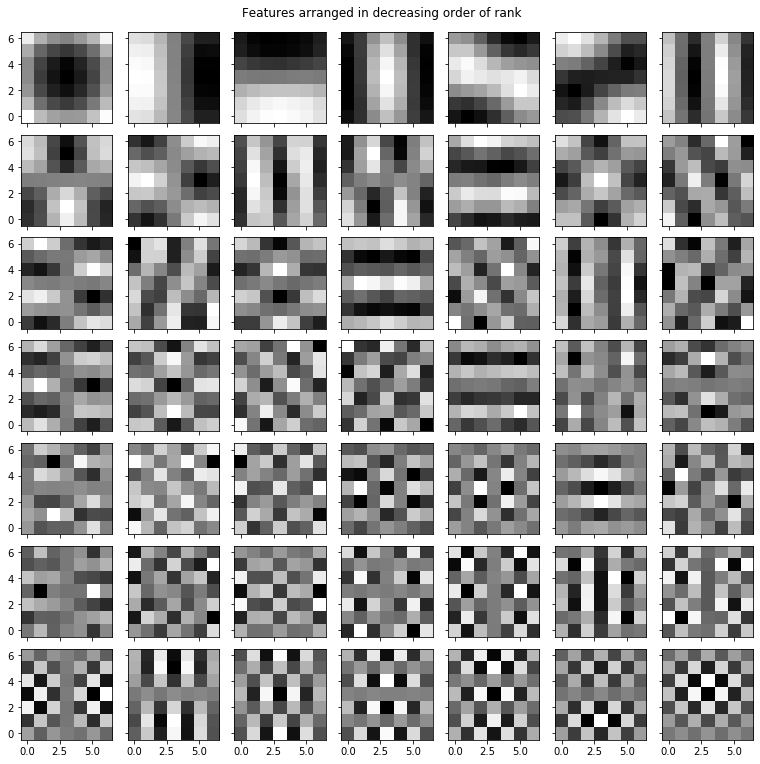

In [12]:
#Plotting the features:
fig, ax = plt.subplots(7,7,sharex=True,sharey=True,figsize=[10.5,10.5],constrained_layout=True)
ax = ax.flatten()

for i in range(49):
    ax[i].imshow(CompImages[i],cmap='gray',origin='lower')

fig.suptitle("Features arranged in decreasing order of rank")
fig.savefig("Q1PCAFeatures.jpg")

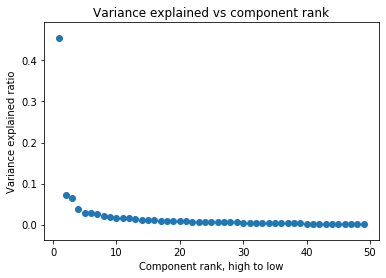

In [13]:
#Now let's plot the eigenvalues:
plt.scatter(range(1,50),pca.explained_variance_ratio_)
plt.xlabel("Component rank, high to low")
plt.ylabel("Variance explained ratio")
plt.title("Variance explained vs component rank")
plt.savefig("Q1EigenvalueRatios.jpg")

In [14]:
#Question 2: ICA on the patches. For this, we don't need the log transform. First we load the patches:
import seaborn as sns
Images=np.array(Images)
X = [[0 for x in range(49)] for y in range(36*36*45)]
for x in np.arange(0,45):
    for t in np.arange(0,36):
        for i in np.arange(0,36):
            X[i+36*t+x*1296]=Images[x,0+i*7:7+i*7,0+t*7:7+t*7].flatten() 

In [15]:
#We center the data:
X = X - np.mean(X,axis=0)
np.shape(X)

#Now we whiten. First, finding the eigenvalues and eigenvectors:
Eigval, V = np.linalg.eig(np.cov(X,rowvar=False))

#Storing the root of eigenvalues:
D = np.linalg.inv(np.diag(np.sqrt(Eigval)))

#The whitening transformation:
XWhite = X@V@D@V.T

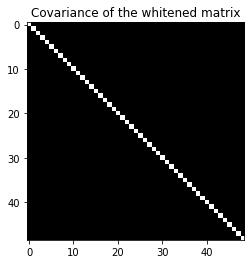

In [16]:
#Checking to see if the whitening transformation worked:
plt.imshow(np.cov(XWhite,rowvar=False),cmap='gray')
plt.title("Covariance of the whitened matrix")
plt.savefig("Q2WhiteCov.jpg")

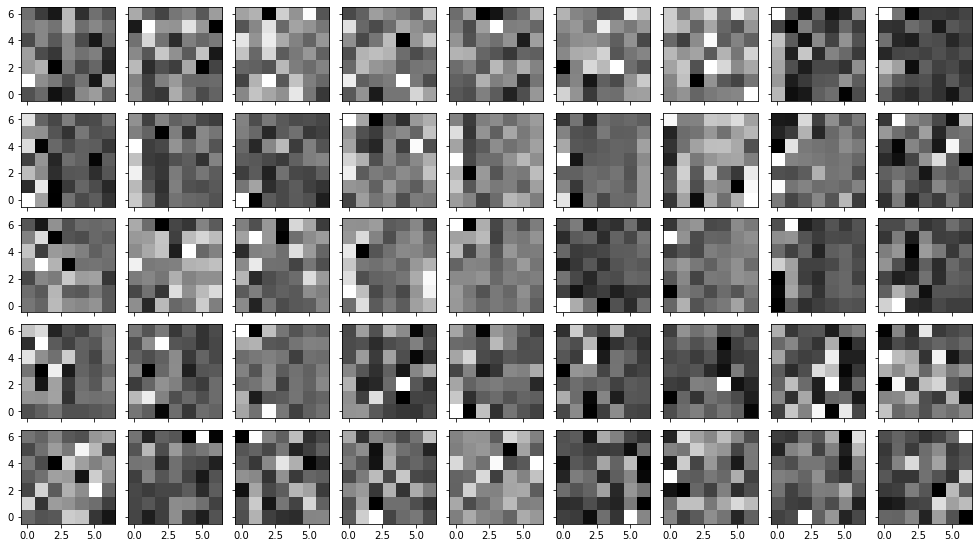

In [17]:
#the first 45 whitened patches
fig, ax = plt.subplots(5,9,sharex=True,sharey=True,figsize=[13.5,7.5],constrained_layout=True)
ax = ax.flatten()
patches_white_tmp= [[0 for x in range(7)] for y in range(7)]
patches_white_subset = np.empty((45,7,7))
for m in range(45):
    for i in np.arange(0,7):
        patches_white_tmp[i]=XWhite[m][i*7:7*i+7]
    patches_white_subset[m]=patches_white_tmp
    patches_tmp= [[0 for x in range(7)] for y in range(7)]
for i in range(45):
    ax[i].imshow(patches_white_subset[i],cmap='gray',origin='lower')

In [18]:
#performing fastICA using sklearn
from sklearn.datasets import load_digits
from sklearn.decomposition import FastICA
s=np.array(XWhite)
transformer = FastICA(n_components=49,random_state=6)
#X_transformed = transformer.fit_transform(s)
X_transformed = transformer.fit(s)

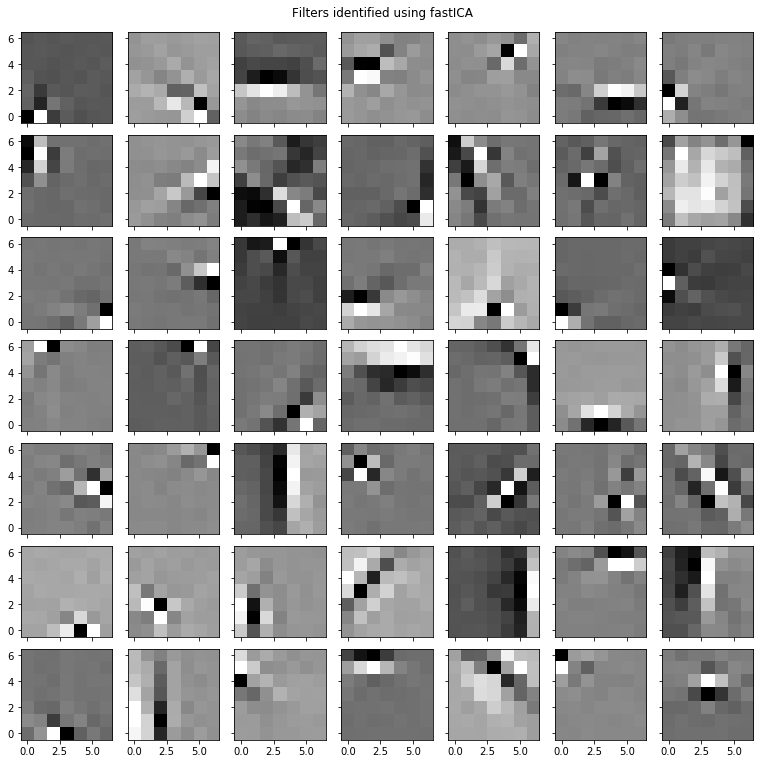

In [19]:
#plot filters found using FastICA sklearn
filters_ICA = np.zeros((49,7,7))
for i in range(49):
    l=0
    for j in range(7):
        for k in range(7):
            filters_ICA[i][j][k] = transformer.components_[i][l]
            l+=1
fig, ax = plt.subplots(7,7,sharex=True,sharey=True,figsize=[10.5,10.5],constrained_layout=True)
ax = ax.flatten()

for i in range(49):
    ax[i].imshow(filters_ICA[i],cmap='gray',origin='lower')
fig.suptitle("Filters identified using fastICA")
fig.savefig("ICA_filters.jpg")

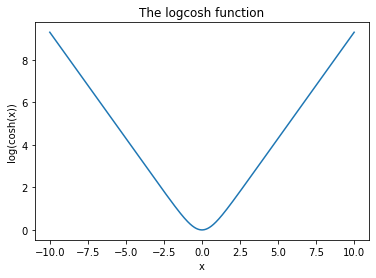

In [5]:
#Plotting the logcosh function:
XVal = np.arange(-10,10.01,0.01)
plt.plot(XVal,np.log(np.cosh(XVal)))
plt.xlabel("x")
plt.ylabel("log(cosh(x))")
plt.title("The logcosh function")
plt.savefig("Logcosh.jpg")

In [35]:
#ALTERNATIVE SOLUTION Q3: Optimizing the objective function to find features. Filter choice 1 - homogeneous.
# w = np.ones(49)
# w = w/np.linalg.norm(w)

#Filter choice 2 - 1 at 1, 0 everywhere else:
w = np.zeros(49)
w[37] = 1

#Filter 3 - random:
# w = np.random.rand(49)
# w = w/np.linalg.norm(w)

#Number of patches:
numPatches = np.shape(XWhite)[0]

#Defining the objective function. Since scipy has minimizers, f here is the negative of what's given in text:
def f(w):
    return (1/numPatches)*np.sum(np.log(np.cosh(XWhite@w)))

#This is the constraint function
def cons(w):
    return 1/np.linalg.norm(w)

#Defining the nonlinear constraint:
nlc = sciopt.NonlinearConstraint(cons, 1-1e-10, 1+1e-10)

#Now, we minimize f:
res = sciopt.minimize(f,w,constraints=nlc)
print("Norm of wBest: ",np.linalg.norm(res.x))

#The results of optimization:
print(res)

Norm of wBest:  1.0000004790910375
     fun: 0.3089490002911948
     jac: array([-4.68625873e-03,  1.16866454e-03, -5.80247492e-04, -7.89166987e-03,
        5.26886433e-04,  8.23132694e-04, -2.58930400e-03, -1.35647319e-02,
        4.39774618e-03, -1.85450912e-03,  1.34188682e-04,  1.93808600e-03,
        1.77001208e-03,  1.68193132e-04, -9.00272280e-04, -1.03656538e-02,
       -1.16974860e-02, -4.98475879e-03,  2.30196863e-03,  5.52171841e-03,
        5.41560724e-03, -2.91999429e-04, -7.58924335e-03, -3.08150426e-03,
        2.77601182e-04,  3.93308699e-04, -6.08503446e-03, -1.21531636e-03,
        3.25323232e-02,  2.52816230e-02,  2.34138668e-02,  2.64185742e-02,
        2.90941373e-02,  2.47815289e-02,  2.28512026e-02,  1.13520313e-01,
        1.71840116e-01,  2.09180769e-01,  1.56095151e-01,  1.06027070e-01,
        5.99242970e-02,  3.17004994e-02, -9.57078934e-02, -1.41839277e-01,
       -1.70214389e-01, -1.42387558e-01, -1.02086622e-01, -6.29411787e-02,
       -3.65865640e-02])
 

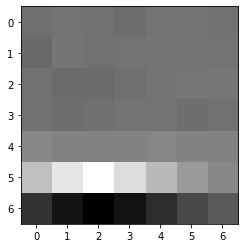

In [36]:
#Loading the optimum filter w to a 7*7 image:
wBest = np.zeros((7,7))

k=0
for i in range(7):
    for j in range(7):
        wBest[i][j] = res.x[k]
        k+=1
        
#Plotting it:
plt.imshow(wBest,cmap='gray')
plt.savefig("Q3.jpg")

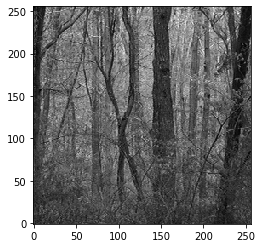

In [20]:
#bonus question2
#plot image 1
plt.imshow(Images[0],cmap='gray',origin='lower')

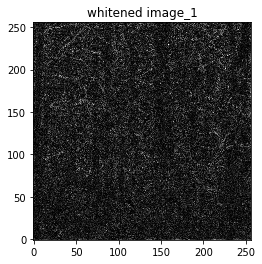

In [21]:
#whitened image 1
image_1_f = np.fft.fft2(Images[0])
#norm = 1./np.sqrt((np.mean(abs(image_1_f),axis=0)*2))
#image_1_norm=image_1_f*norm
image_1_norm=image_1_f
for i in np.arange(0,256):
    for x in np.arange(0,256):
        image_1_norm[i][x]= image_1_f[i][x]/abs(image_1_f[i][x])
image_1_if=np.fft.ifft2(image_1_norm)
plt.imshow(abs(image_1_if),cmap='gray',origin='lower')
plt.title("whitened image_1")
plt.savefig("Whitened_Image_1.jpg")

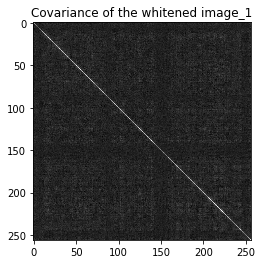

In [22]:
#Checking the covariance matrix for image 1 after the whitening transformation:
plt.imshow(np.cov(abs(image_1_if),rowvar=False),cmap='gray')
plt.title("Covariance of the whitened image_1")
plt.savefig("WhiteCov_Image_1.jpg")

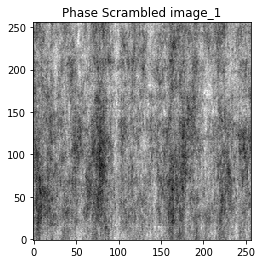

In [23]:
#phase-scrambled image 1
image_1_f_2 = np.fft.fft2(Images[0])
randPhase = 2.0 * np.pi * 1j * np.random.rand(*image_1_f_2.shape)
plt.imshow(np.fft.ifft2(abs(image_1_f_2)*np.exp(randPhase)).real,cmap='gray',origin='lower')
plt.title("Phase Scrambled image_1")
plt.savefig("Phase_scrambled_Image_1.jpg")

In [24]:
#kmeans on whitened images / filters plotted
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=49,random_state=1).fit(XWhite)

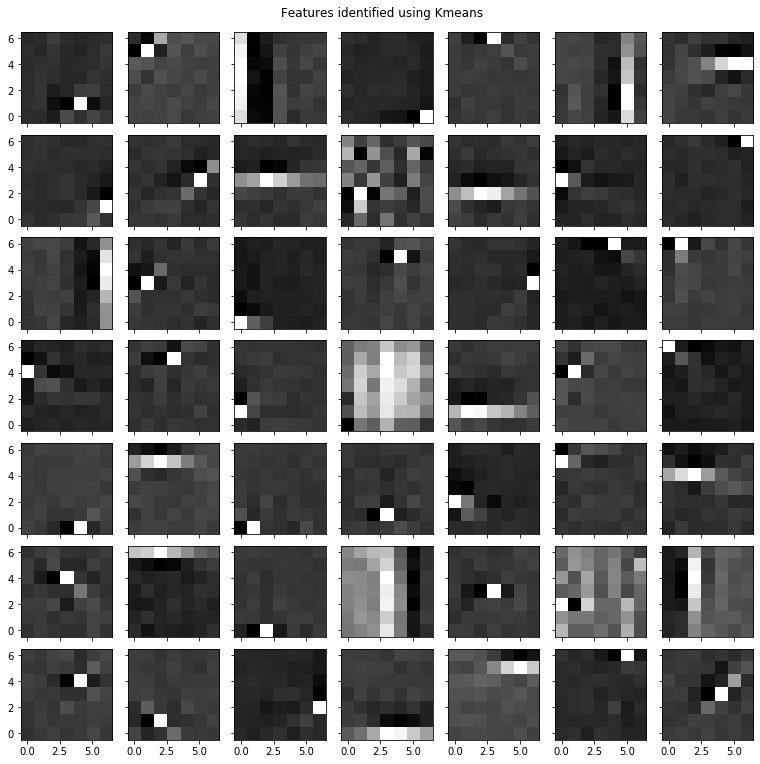

In [25]:
#Plotting the kmeans features:
features_kmeans = np.zeros((49,7,7))
for i in range(49):
    l=0
    for j in range(7):
        for k in range(7):
            features_kmeans[i][j][k] = kmeans.cluster_centers_[i][l]
            l+=1

fig, ax = plt.subplots(7,7,sharex=True,sharey=True,figsize=[10.5,10.5],constrained_layout=True)
ax = ax.flatten()

for i in range(49):
    ax[i].imshow(features_kmeans[i],cmap='gray',origin='lower')
fig.suptitle("Features identified using Kmeans")
fig.savefig("BonusKmeansFeatures.jpg")